## Создание БД и загрузка файлов в нее

In [1]:
import sqlite3
import pandas as pd

In [2]:
conn = sqlite3.connect('mydb.db')

In [3]:
# Прочитаем файлы
crm = pd.read_csv("crm_data.csv")
visits = pd.read_csv("site_visits_data.csv")
total = pd.read_csv("total_data.csv")

In [4]:
crm.head()

,user_id,id_contact,age,spoke_with_agent,application_ts,documents_send,documents_recieved,flag
0,0947abecd9b9ee653139dcafaf48e243,718951688,28,1,2019-07-19 16:07:25 UTC,0,0,0
1,baaa6faf65e6a37630e43520d061a0aa,721632137,29,1,2019-07-22 16:02:23 UTC,0,0,0
2,856d1cf0187a188a40f9749fdd28cc3d,718659195,20,0,2019-07-19 07:09:59 UTC,1,0,0
3,87f07128d407c5b0b4ce154d2202d4e9,719838762,41,1,2019-07-20 12:31:32 UTC,0,0,0
4,f822a4d35abadb48fb35d7829d8470b1,719324076,22,1,2019-07-20 06:55:21 UTC,0,0,0


In [5]:
visits.head()

,user_id,visit_start_time,session_duration,delivery_pickup,bounce_rate,total_sessions,user_type,visited_partners,step_1,step_2,step_3
0,1fb42a882f576c05f226ad3bf313caa1,2019-07-22 06:12:57 UTC,0,not_stated,1,1,new,0,0,0,0
1,7b2eb4009b25b2b02589b8b60fd8a3e3,2019-07-22 08:04:27 UTC,0,not_stated,1,1,old,0,0,0,0
2,39f4448e01e3126a9b35b32ae5b36bbe,2019-07-22 13:39:54 UTC,0,not_stated,1,1,old,0,0,0,0
3,12beb8d6d22fc4d1000b4cd0469f7dec,2019-07-22 14:54:17 UTC,0,not_stated,1,1,old,0,0,0,0
4,a2f10e983bdf1c5fbb04e3d89a4f5396,2019-07-22 18:21:49 UTC,0,not_stated,1,1,old,0,0,0,0


In [6]:
total.head()

,request_id,age,spoke_with_agent,documents_send,documents_recieved,flag,delivery_pickup,session_duration,bounce_rate,sessions,visited_partners,step_1,step_2,step_3,user_type
0,853b5d24c44a1bd3255c679fe10ae1fd,45,0,0,0,0,not_stated,0.0,1.0,1,0,0,0,0,new
1,853b5d24c44a1bd3255c679fe10ae1fd,45,0,0,0,0,delivery,171.0,0.0,1,0,1,0,0,old
2,7ae319b1bd27ca5eaf622a9421a3014d,31,1,0,0,0,pickup,40.0,0.0,1,0,0,0,0,new
3,06993ceab2ede613bce365880572460c,23,1,0,0,0,pickup,229.0,0.0,2,1,2,0,0,new
4,d9bf61f493e7e37df134a2e1284ccd00,29,1,0,0,0,pickup,152.0,0.0,1,1,0,0,0,old


In [7]:
# Создадим в БД 3 таблицы crm и visits
crm.to_sql('crm', conn, if_exists='replace', index=False)
visits.to_sql('visits', conn, if_exists='replace', index=False)
total.to_sql('total', conn, if_exists='replace', index=False)

In [8]:
def fetch_query(query):
    return pd.read_sql_query(query, conn)

In [9]:
# Создаем запрос в виде строки 
query = """
SELECT * 
FROM crm
LIMIT 10
"""

# Передаем его на вход функции
fetch_query(query)

,user_id,id_contact,age,spoke_with_agent,application_ts,documents_send,documents_recieved,flag
0,0947abecd9b9ee653139dcafaf48e243,718951688,28,1,2019-07-19 16:07:25 UTC,0,0,0
1,baaa6faf65e6a37630e43520d061a0aa,721632137,29,1,2019-07-22 16:02:23 UTC,0,0,0
2,856d1cf0187a188a40f9749fdd28cc3d,718659195,20,0,2019-07-19 07:09:59 UTC,1,0,0
3,87f07128d407c5b0b4ce154d2202d4e9,719838762,41,1,2019-07-20 12:31:32 UTC,0,0,0
4,f822a4d35abadb48fb35d7829d8470b1,719324076,22,1,2019-07-20 06:55:21 UTC,0,0,0
5,2fce19bc21dfe3d89f149047b0ef8637,718957000,27,1,2019-07-19 16:38:02 UTC,0,0,0
6,eb106524e9a456e255041c69bb5778cc,719876679,35,1,2019-07-20 13:34:28 UTC,0,0,0
7,300651e9502dc76204377e9fce2734dc,721134206,29,1,2019-07-22 04:47:07 UTC,0,0,0
8,18e49cef40df0b2ae76a470fe13d5303,718880266,40,1,2019-07-19 12:54:33 UTC,0,0,0
9,5022c6ff49cbbc4e24d00d09be7a9291,722020100,46,0,2019-07-23 13:57:10 UTC,0,0,0


## Запросы, решающие поставленные задачи

In [10]:
query = """
Select flag, count(id_contact) as cnt_client, avg(age) as avg_age, sum(documents_send) as sum_docs
from crm
group by flag
having max(age)>=20
order by cnt_client desc
"""
fetch_query(query)

,flag,cnt_client,avg_age,sum_docs
0,0,7018,32.267883,1031
1,1,561,37.459893,534


In [11]:
query = """
Select id_contact, sum(documents_send) as dosc_sent
from crm
group by id_contact
order by dosc_sent desc
"""
fetch_query(query)

,id_contact,dosc_sent
0,722114693,1
1,722114644,1
2,722110915,1
3,722110901,1
4,722110871,1
...,...,...
7574,718534053,0
7575,718533999,0
7576,718533992,0
7577,718533908,0


In [12]:
query = """
Select *
from (
Select *, row_number() over (partition by id_contact order by application_ts) as row_number
from crm) as t1
where row_number =3
"""
fetch_query(query)

,user_id,id_contact,age,spoke_with_agent,application_ts,documents_send,documents_recieved,flag,row_number


In [13]:
query = """

Select *
from (
Select *, row_number() over (partition by t1.user_id order by visit_start_time) as row_number
from crm as t1
inner join visits as t2
on t1.user_id = t2.user_id) as t1
where row_number = 3

"""
fetch_query(query)

,user_id,id_contact,age,spoke_with_agent,application_ts,documents_send,documents_recieved,flag,user_id:1,visit_start_time,session_duration,delivery_pickup,bounce_rate,total_sessions,user_type,visited_partners,step_1,step_2,step_3,row_number
0,0023d62e079ee14d5488c29db03ccb38,718910498,32,0,2019-07-19 14:09:14 UTC,0,0,0,0023d62e079ee14d5488c29db03ccb38,2019-07-21 08:59:25 UTC,0,not_stated,1,1,old,0,0,0,0,3
1,003673b3fda12cb05d2aa8467c12d6cc,718626919,22,1,2019-07-19 06:03:00 UTC,0,0,0,003673b3fda12cb05d2aa8467c12d6cc,2019-07-19 06:05:23 UTC,153,pickup,0,1,old,0,0,0,0,3
2,0054a9477c1caa935b436b9572c28cbb,721579036,52,1,2019-07-22 11:19:39 UTC,0,0,0,0054a9477c1caa935b436b9572c28cbb,2019-07-22 11:11:05 UTC,1,pickup,0,1,old,0,1,0,0,3
3,0093d7eba24df4aa808482e40fff638c,718677305,20,1,2019-07-19 07:34:56 UTC,0,0,0,0093d7eba24df4aa808482e40fff638c,2019-07-19 07:30:03 UTC,52,pickup,0,1,old,0,1,0,0,3
4,010896f4037462d5c9239d408fd0fed8,720927474,28,1,2019-07-21 14:03:23 UTC,1,0,0,010896f4037462d5c9239d408fd0fed8,2019-07-21 13:54:20 UTC,2,pickup,0,1,old,0,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675,feffe87a79e63594ec4c96b7d6a4b68f,721132037,33,1,2019-07-22 04:34:03 UTC,0,0,0,feffe87a79e63594ec4c96b7d6a4b68f,2019-07-22 11:58:20 UTC,0,not_stated,1,1,old,0,0,0,1,3
1676,ff2028137e3d2889311724e29fd3bb40,722009318,39,1,2019-07-23 12:47:21 UTC,1,1,1,ff2028137e3d2889311724e29fd3bb40,2019-07-23 12:33:06 UTC,200,not_stated,0,1,old,0,0,0,0,3
1677,ff70a3db3f2449cb783a54e64068e94c,718822868,31,0,2019-07-19 10:58:44 UTC,0,0,0,ff70a3db3f2449cb783a54e64068e94c,2019-07-21 09:17:22 UTC,0,not_stated,1,1,old,0,0,0,0,3
1678,ff7f9558eb51ef16bd9b2b5f005c886a,721261932,25,0,2019-07-22 05:52:38 UTC,0,0,0,ff7f9558eb51ef16bd9b2b5f005c886a,2019-07-22 05:55:41 UTC,27,not_stated,0,1,old,0,0,0,1,3


## Анализ данных и обучение моделей

In [14]:
query = """

Select *
from crm as t1


"""
data = fetch_query(query)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7579 entries, 0 to 7578
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             7579 non-null   object
 1   id_contact          7579 non-null   int64 
 2   age                 7579 non-null   int64 
 3   spoke_with_agent    7579 non-null   int64 
 4   application_ts      7579 non-null   object
 5   documents_send      7579 non-null   int64 
 6   documents_recieved  7579 non-null   int64 
 7   flag                7579 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 473.8+ KB


In [16]:
data['application_ts'] = pd.to_datetime(data['application_ts'])

In [17]:
data.drop(['user_id', 'id_contact'], axis = 1, inplace = True)

In [18]:
data.head()

,age,spoke_with_agent,application_ts,documents_send,documents_recieved,flag
0,28,1,2019-07-19 16:07:25+00:00,0,0,0
1,29,1,2019-07-22 16:02:23+00:00,0,0,0
2,20,0,2019-07-19 07:09:59+00:00,1,0,0
3,41,1,2019-07-20 12:31:32+00:00,0,0,0
4,22,1,2019-07-20 06:55:21+00:00,0,0,0


In [19]:
data.describe()

,age,spoke_with_agent,documents_send,documents_recieved,flag
count,7579.000000,7579.000000,7579.000000,7579.000000,7579.000000
mean,32.652197,0.647711,0.206492,0.074020,0.074020
std,9.329495,0.477715,0.404814,0.261821,0.261821
min,20.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000,0.000000,0.000000
50%,31.000000,1.000000,0.000000,0.000000,0.000000
75%,38.000000,1.000000,0.000000,0.000000,0.000000
max,83.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
import seaborn as sns

<AxesSubplot:>

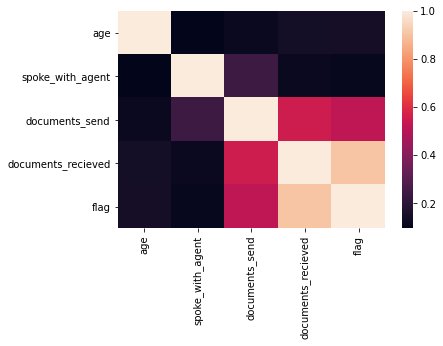

In [21]:
sns.heatmap(data.corr())

In [22]:
data.corr()

,age,spoke_with_agent,documents_send,documents_recieved,flag
age,1.000000,0.095824,0.117097,0.142466,0.145708
spoke_with_agent,0.095824,1.000000,0.239057,0.122000,0.112504
documents_send,0.117097,0.239057,1.000000,0.554242,0.520626
documents_recieved,0.142466,0.122000,0.554242,1.000000,0.905674
flag,0.145708,0.112504,0.520626,0.905674,1.000000


In [23]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

<Figure size 864x648 with 0 Axes>

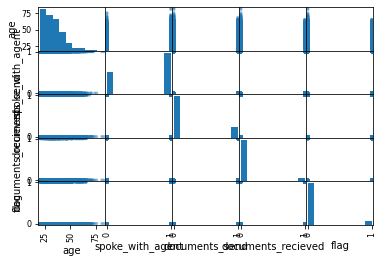

In [24]:
plt.figure(figsize=(12,9))
scatter_matrix(data);

<AxesSubplot:xlabel='flag', ylabel='documents_recieved'>

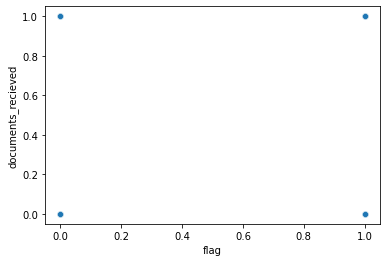

In [25]:
sns.scatterplot(data=data, x='flag', y ='documents_recieved')

<AxesSubplot:xlabel='flag', ylabel='age'>

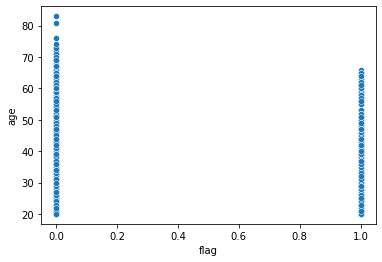

In [26]:
sns.scatterplot(data=data, x='flag', y ='age')

In [27]:
data.drop('documents_recieved', axis=1, inplace = True)

In [28]:
# data['month'] = data['application_ts'].dt.month
data['day_of_week'] = data['application_ts'].dt.weekday

<AxesSubplot:xlabel='flag', ylabel='documents_send'>

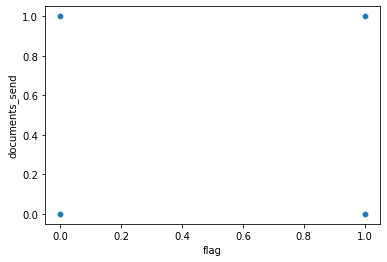

In [31]:
sns.scatterplot(data=data, x='flag', y ='documents_send')

In [32]:
data.drop('documents_send', axis=1, inplace = True)

In [34]:
data_new = pd.get_dummies(data, drop_first=True)

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score, make_scorer

In [36]:
x_train, x_test, y_train, y_test = train_test_split(
    data.drop(['application_ts','flag'],axis=1), data['flag'], random_state=12345, test_size=0.2)

In [37]:
x_train

,age,spoke_with_agent,day_of_week
6121,34,1,0
1539,22,1,1
4535,34,1,4
4819,59,0,5
860,26,0,6
...,...,...,...
3492,42,0,5
2177,54,0,6
7453,30,0,4
3557,33,1,4


<AxesSubplot:>

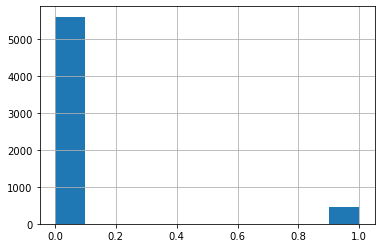

In [38]:
y_train.hist()

In [39]:
model = LogisticRegression(class_weight='balanced')

In [41]:
scorer = make_scorer(roc_auc_score, needs_proba = True)

In [42]:
cvs = cross_val_score(model, x_train, y_train, cv = 5, scoring=scorer, n_jobs=-1)

In [43]:
cvs.mean()

0.6975704423713044

In [44]:
model.fit(x_train, y_train)

LogisticRegression(class_weight='balanced')

In [45]:
roc_auc_score(y_test, model.predict_proba(x_test)[:,1])

0.6857649000194137

In [46]:
model_2 = RandomForestClassifier(max_depth=3,random_state=12345)

In [47]:
cvs = cross_val_score(model_2, x_train, y_train, cv = 5, scoring=scorer, n_jobs=-1)

In [48]:
cvs.mean()

0.692214985380413

In [49]:
model_2.fit(x_train, y_train)

RandomForestClassifier(max_depth=3, random_state=12345)

In [50]:
roc_auc_score(y_test, model_2.predict_proba(x_test)[:,1])

0.682613639515212

In [51]:
pd.DataFrame(model.coef_.T, index = list(x_train))

,0
age,0.057629
spoke_with_agent,1.074054
day_of_week,-0.001055


In [52]:
model.predict_proba(x_test)[:,1]

array([0.39981021, 0.22255319, 0.32610462, ..., 0.55797286, 0.87024456,
       0.4862021 ])

In [53]:
model.intercept_

array([-2.80049824])

In [59]:
pd.DataFrame(model_2.feature_importances_, index = list(x_train))

,0
age,0.622838
spoke_with_agent,0.330879
day_of_week,0.046283
